

# Project: Predicting listing prices for Amsterdam Airbnb

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#ml">Regression Models Implemenation</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This Dataset is provided by [Airbnb ](http://insideairbnb.com/get-the-data.html), Airbnb Inc. operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. It is based in San Francisco, California. The platform is accessible via website and mobile app. direct link to the Dataset is found [here'](http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2021-02-08/visualisations/listings.csv)

>Inspiration: Inspired by the [Kaggle Seattle dataset ](https://www.kaggle.com/airbnb/seattle), and also the Ames IOWA dataset I thought this dataset would do a similar job as in the IBM regression model course 

>Main objective of the analysis: Predicting price listings over interpretation

>Brief description of the data set :
This dataset contains 16 columns and 18291 observations, (11 numerical and 5 object datatype)

>Data Attributes Summary:

| Column name   | Desc         |
|:------------- |:-------------| 
| ID            | Numerical,Listing ID    | 
| Name          | String, A tagline breifly describing the rental      |
| Host ID       | Numerical       |
| Host Name     | String |
| Neigborhood group|All nans, it may not be available for this particular dataset |
| Neighbourhood | String name of the neighborhood|
| Latitude      | Numerical|
| Longitude     | Numerical|
| Room_type     | Categorical (Entire home/apartment, Private room, Hotel room, Shared room)|
| Price         | Numerical(Int)|
| Minimum_nights| Numerical, Minimum nights stay|
| Number_of_reviews|Numerical, Total Number of reviews|
| Last_review |Object, last review date|
| Reviews_per_month |Numerical|
| Calculated_host_listings_count| Numerical, number of listings per host|
| Availability_365 |Numerical, includes the availabiity calendar for 365 days in the future|

> For more Info here's a [link](http://insideairbnb.com/about.html#disclaimers) to inside airbnb webpage including about info and disclaimers


#### Questions to investigate regarding the EDA of this dataset:

>What are the most popular neighborhoods in Amsterdam?

>What are the average prices of each neighborhood? which are the highest and which are the lowest?

>what are the most typically rented room types?

>Which month of the year has the peak in reviews / visits?

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Loading the dataset 

In [2]:
df = pd.read_csv('listings.csv')
df.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,1.92,1,139


In [3]:
#shape of the dataset , 18291 rows and 16 columns
df.shape

(18291, 16)

In [4]:
#this ds has no duplicates
df.duplicated().any()

False

In [5]:
#checking df datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18291 entries, 0 to 18290
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              18291 non-null  int64  
 1   name                            18258 non-null  object 
 2   host_id                         18291 non-null  int64  
 3   host_name                       18228 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   18291 non-null  object 
 6   latitude                        18291 non-null  float64
 7   longitude                       18291 non-null  float64
 8   room_type                       18291 non-null  object 
 9   price                           18291 non-null  int64  
 10  minimum_nights                  18291 non-null  int64  
 11  number_of_reviews               18291 non-null  int64  
 12  last_review                     

In [6]:
#sum of all null values in columns
df.isnull().sum()

id                                    0
name                                 33
host_id                               0
host_name                            63
neighbourhood_group               18291
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        2389
reviews_per_month                  2389
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<a id='wrangling'></a>
## Data Wrangling



### Data Cleaning 

> Delete neighborhood group ,delete na rows 

> Change last review date into datetime type for further parsing of months

> Host names, ids columns will probably not matter regarding the prediction so will be deleted


In [4]:
#1st making a copy of the original dataframe
df_c = df.copy()

In [5]:
#Deleting Neighborhood group and host_name columns:
df_c = df_c.drop(['neighbourhood_group','host_name'], axis=1)

In [6]:
#test
df_c.columns.to_list()

['id',
 'name',
 'host_id',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [7]:
#Change last_review column to datetime type
df_c['last_review'] = pd.to_datetime(df['last_review'])

In [8]:
#Test
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18291 entries, 0 to 18290
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              18291 non-null  int64         
 1   name                            18258 non-null  object        
 2   host_id                         18291 non-null  int64         
 3   neighbourhood                   18291 non-null  object        
 4   latitude                        18291 non-null  float64       
 5   longitude                       18291 non-null  float64       
 6   room_type                       18291 non-null  object        
 7   price                           18291 non-null  int64         
 8   minimum_nights                  18291 non-null  int64         
 9   number_of_reviews               18291 non-null  int64         
 10  last_review                     15902 non-null  datetime64[ns]
 11  re

In [9]:
#delete all null values
df_c.dropna(inplace=True)

In [10]:
#Test 
df_c.isna().sum()

id                                0
name                              0
host_id                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis



## Univariate Exploration


In [10]:
print('The Total number of Unique neighborhoods in Amsterdam is:',df.neighbourhood.nunique())
print(df_c.neighbourhood.value_counts())

The Total number of Unique neighborhoods in Amsterdam is: 22
De Baarsjes - Oud-West                    2722
De Pijp - Rivierenbuurt                   1963
Centrum-West                              1745
Centrum-Oost                              1324
Westerpark                                1236
Zuid                                      1124
Oud-Oost                                  1052
Bos en Lommer                              920
Oostelijk Havengebied - Indische Buurt     776
Oud-Noord                                  497
Watergraafsmeer                            442
IJburg - Zeeburgereiland                   355
Slotervaart                                347
Noord-West                                 303
Noord-Oost                                 214
Buitenveldert - Zuidas                     201
Geuzenveld - Slotermeer                    174
Gaasperdam - Driemond                      110
Osdorp                                     105
De Aker - Nieuw Sloten                     100

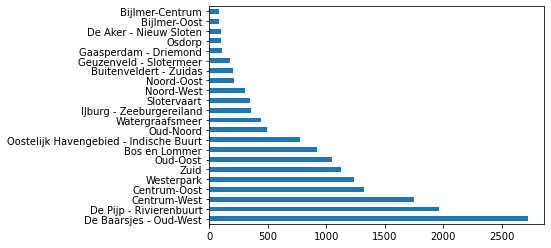

In [11]:
#plotting a horizontal barplot for neighbourhoods
df_c.neighbourhood.value_counts().plot(kind ='barh');

> The 3 most popular neighborhood is De Baarsjes - Oud-West, De Pijp - Rivierenbuurt then Centrum-West

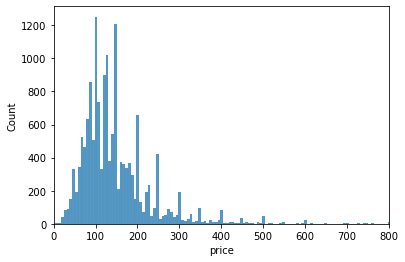

In [69]:
sb.histplot(data=df_c, x='price')
plt.xlim(0,800);

> The price variable is right skewed with some extreme outliers values (8000 USD)

> Most of the values are between 80 and 200 with average price 150

In [70]:
#transforming price values into a log scale
df_c.price.describe()

count    15878.000000
mean       151.313893
std        160.983046
min          4.000000
25%         95.000000
50%        126.000000
75%        179.000000
max       8000.000000
Name: price, dtype: float64

In [15]:
np.log1p(df['price'].describe())

count    9.814219
mean     5.037316
std      5.100079
min      0.000000
25%      4.564348
50%      4.859812
75%      5.198497
max      8.987322
Name: price, dtype: float64

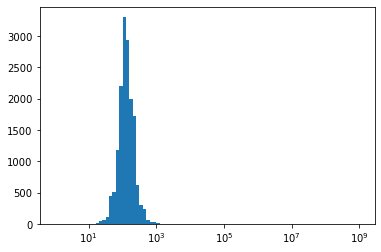

In [22]:
# Get the ticks for bins between [0 - maximum price]
bins = 10 ** np.arange(0, 9+0.1, 0.1)

# Generate the x-ticks you want to apply
ticks = [0, 4, 5, 6, 8]

# Plot the histogram
plt.hist(data=df_c, x='price', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')


Entire home/apt    14283
Private room        3831
Hotel room           127
Shared room           50
Name: room_type, dtype: int64


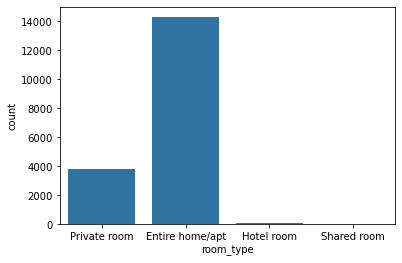

In [18]:
#plotting a bar plot for the room type variable to check the most rented room types
print(df.room_type.value_counts())
sb.countplot(data=df, x='room_type', color=color);

> The Entire home or aptartment is the most rented, then the private room.

In [24]:
df.availability_365.value_counts(bins=5)

(-0.366, 73.0]    13683
(292.0, 365.0]     1913
(73.0, 146.0]      1264
(146.0, 219.0]      928
(219.0, 292.0]      503
Name: availability_365, dtype: int64

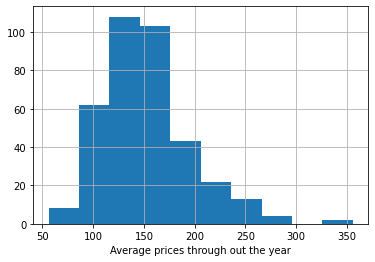

In [115]:
df.groupby('availability_365')['price'].mean().hist()
plt.xlabel('Average availability through out the year');

In [67]:
df_c.availability_365.describe()

count    15878.000000
mean        60.766406
std        114.668333
min          0.000000
25%          0.000000
50%          0.000000
75%         71.000000
max        365.000000
Name: availability_365, dtype: float64

> So the average availability of the year is around 70 to 170 days

## Bivariate Exploration & Multivariate Exploration


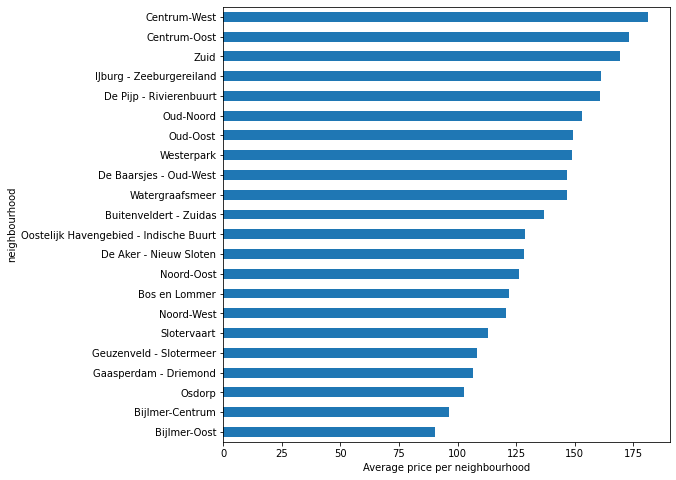

In [130]:
#plotting a horizontal bar chart for highly priced neighborhoods to the least
df_group1 = df_c.groupby('neighbourhood')['price'].mean()
plt.figure(figsize=(8,8))
df_group1.sort_values().plot(kind ='barh')
plt.xlabel('Average price per neighbourhood');

> The most expensive neighbourhood on average is Centrum-West with 181 USD and the least expensive is Bijlmer-Oost 90 USD

> De Baarsjes - Oud-West	which was the most popular neighbourhood average price is  146 USD

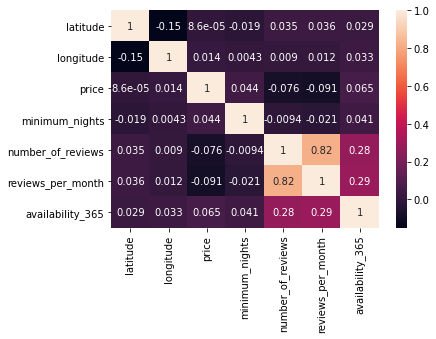

In [116]:
#creating a numerical slice to plot relationships
df_slice =df_c[['latitude', 'longitude', 'price', 'minimum_nights','number_of_reviews', 'reviews_per_month','availability_365']]

#seaborn heatmap
sb.heatmap(data=df_slice.corr(), annot=True);

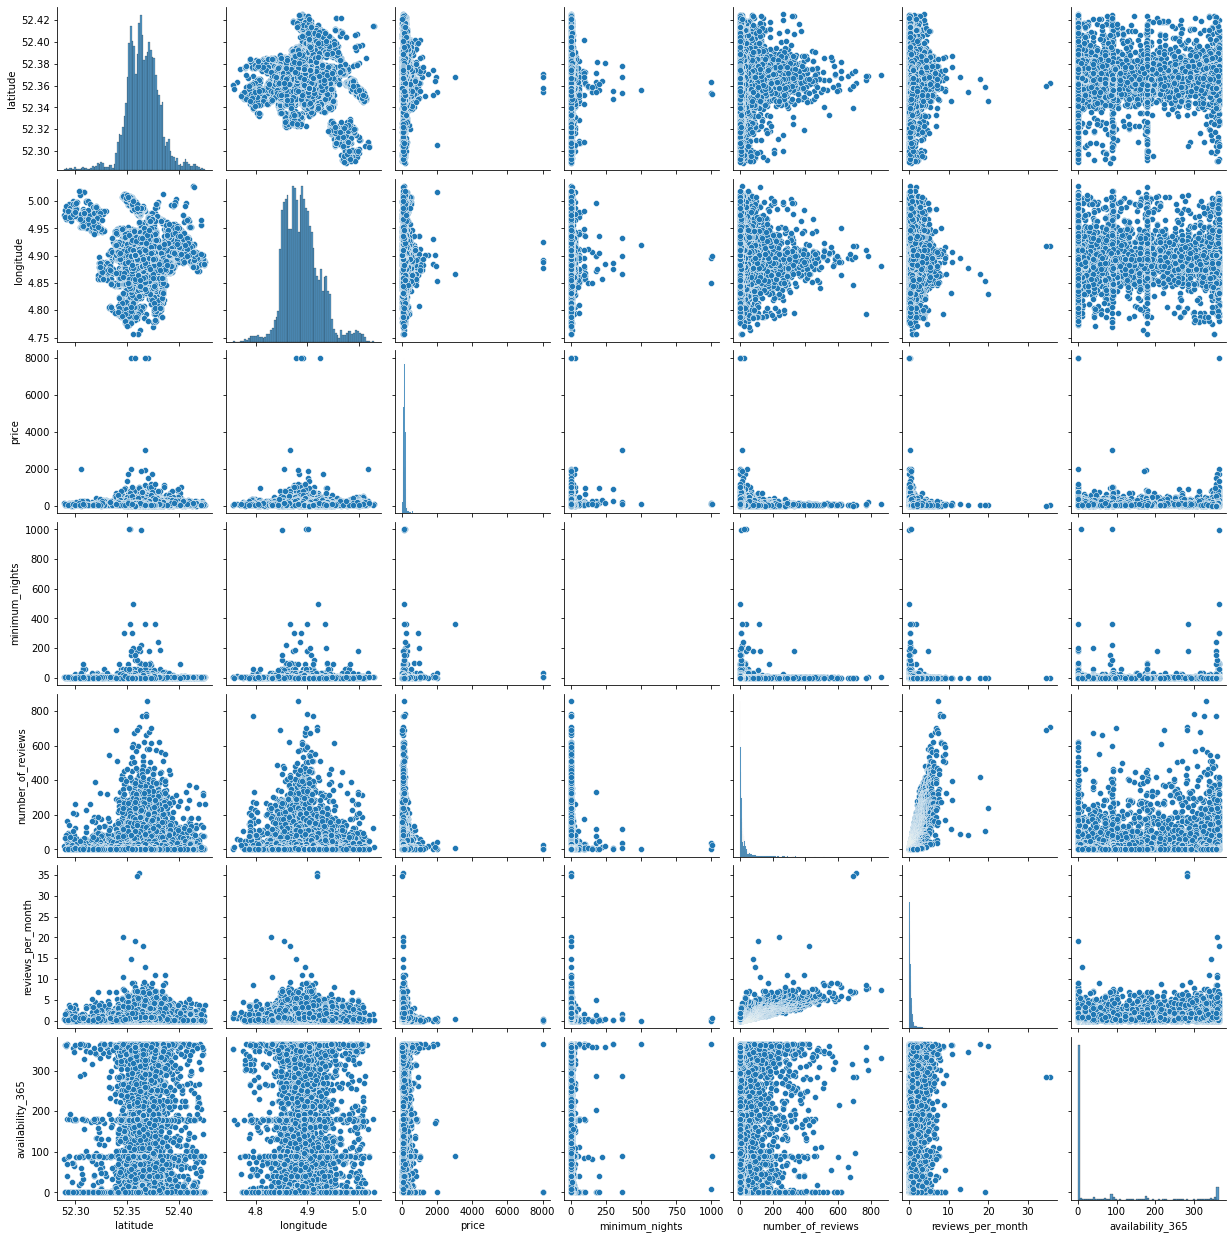

In [138]:
sb.pairplot(data=df_slice);

In [118]:
df_group2 =df_c.groupby('neighbourhood')['number_of_reviews'].count().sort_values(ascending = False)
df_group2.head()

neighbourhood
De Baarsjes - Oud-West     2722
De Pijp - Rivierenbuurt    1963
Centrum-West               1745
Centrum-Oost               1324
Westerpark                 1236
Name: number_of_reviews, dtype: int64

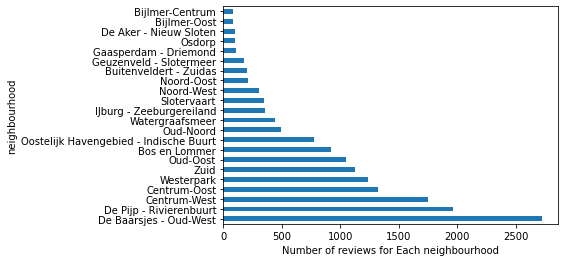

In [119]:
#plotting neighborhoods by mostly reviewed  
df_group2.plot(kind = 'barh')
plt.xlabel('Number of reviews for Each neighbourhood');

> The number of reviews are the total number of reviews a listing gets, but the reviews are a bit ambiguous, it doesn't say whether the review is positive or negative if we suppose on average that most reviews are positive,  The most popular neighbourhood gets the highest number of reviews 
> De Baarsjes - Oud-West (2722), De Pijp - Rivierenbuurt (1963) then Centrum-West (1745)

In [11]:
# extracting month from last_review date column
df_c['Month_last_review'] = pd.DatetimeIndex(df_c['last_review']).month
df_c.head(1)

,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Month_last_review
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,1.92,1,139,2


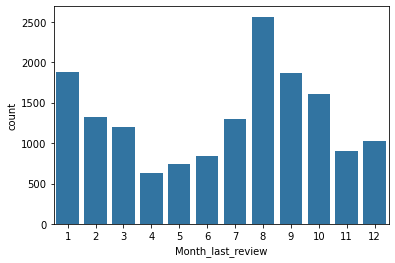

In [123]:
#plotting peak months from the last review column
sb.countplot(data=df_c, x='Month_last_review', color=sb.color_palette()[0]);

In [124]:
df_c.Month_last_review.value_counts()

8     2564
1     1885
9     1867
10    1603
2     1325
7     1293
3     1204
12    1028
11     902
6      840
5      742
4      625
Name: Month_last_review, dtype: int64

> According to the reviews, peak months are August, Sept, and January, those are most visited months of the year

<a id='ml'></a>
## Regression Models

In [12]:
#import all necessary libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error

> One hot encode categoricals using pandas get_dummies

In [14]:
#dropping un-necessary columns
df_c.drop(['id','name','host_id','calculated_host_listings_count','last_review'],axis=1, inplace=True)

In [15]:
df_c.head(1)

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,Month_last_review
0,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,1.92,139,2


In [16]:
# slicing the data set by datatype to get the categorical features

one_hot_encode_cols = df_c.dtypes[df_c.dtypes == np.object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

# Encode these columns as categoricals so one hot encoding works on split data
for col in one_hot_encode_cols:
    df_c[col] = pd.Categorical(df_c[col])



In [17]:
# Do the one hot encoding
data = pd.get_dummies(df_c, columns=one_hot_encode_cols)

In [18]:
data.head(1)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,Month_last_review,neighbourhood_Bijlmer-Centrum,neighbourhood_Bijlmer-Oost,...,neighbourhood_Oud-Noord,neighbourhood_Oud-Oost,neighbourhood_Slotervaart,neighbourhood_Watergraafsmeer,neighbourhood_Westerpark,neighbourhood_Zuid,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,52.36575,4.94142,59,3,278,1.92,139,2,0,0,...,0,0,0,0,0,0,0,0,1,0


In [19]:
#spliting the Data into Train and test splits
train, test = train_test_split(data, test_size=0.3, random_state=42)

In [20]:
# Create a list of float colums to check for skewing
mask = data.dtypes == np.float
float_cols = data.columns[mask]

In [21]:
skew_limit  = 0.75
skew_vals = train[float_cols].skew()

In [22]:
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {0}'.format(skew_limit)))

skew_cols

,Skew
reviews_per_month,9.280903


In [23]:
#transforming the skewed columns using log transformation
pd.options.mode.chained_assignment = None
for col in skew_cols.index.to_list():
    if col == 'price':
        continue
    train[col] = np.log1p(train[col])
    test[col]  = np.log1p(test[col])


In [24]:
#identfying X, y training sets & test sets
feature_cols = [x for x in train.columns if x != 'price']
X_train = train[feature_cols]
y_train = train['price']

X_test  = test[feature_cols]
y_test  = test['price']

In [25]:
# defining a function to calculate Root mean squared error
def rmse(y_true, y_predict):
    return np.sqrt(mean_squared_error(y_true, y_predict))

In [26]:
#Fitting a basic linear regression model

linearRegression = LinearRegression().fit(X_train, y_train)
linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))

print(linearRegression_rmse)

180.55915012914951


In [27]:
#Fitting a regular Ridge model to a range of 𝛼  values
alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, 
                  cv=4).fit(X_train, y_train)

ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))

print(ridgeCV.alpha_, ridgeCV_rmse)

30.0 180.50840244045645


In [28]:
#Fitting a Lasso model using cross validation and determine the optimum value for 𝛼

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=5e4,
                  cv=3).fit(X_train, y_train)

lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))

print(lassoCV.alpha_, lassoCV_rmse)  # Lasso is slower

0.0005 180.5561642795681


In [29]:
print('Of {} coefficients, {} are non-zero with Lasso.'.format(len(lassoCV.coef_), 
                                                               len(lassoCV.coef_.nonzero()[0])))

Of 33 coefficients, 32 are non-zero with Lasso.


In [30]:
# trying the elastic net, with the same alphas as in Lasso, and l1_ratios between 0.1 and 0.9

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.linear_model import ElasticNetCV
l1_ratios = np.linspace(0.1, 0.9, 9)
elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=1e4).fit(X_train, y_train)
elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test))

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)

0.0005 0.1 180.52203694720046


In [31]:
rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]
labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']
rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
rmse_df

,RMSE
Linear,180.559150
Ridge,180.508402
Lasso,180.556164
ElasticNet,180.522037


### Stochastic Gradient Descent

In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDRegressor

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_parameters_dict = {
    'Linear': {'penalty': 'none'},
    'Lasso': {'penalty': 'l2',
           'alpha': lassoCV.alpha_},
    'Ridge': {'penalty': 'l1',
           'alpha': ridgeCV_rmse},
    'ElasticNet': {'penalty': 'elasticnet', 
                   'alpha': elasticNetCV.alpha_,
                   'l1_ratio': elasticNetCV.l1_ratio_}
}
new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train_scaled, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test_scaled))

rmse_df['RMSE-SGD-scaled'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD-scaled
Linear,180.559150,180.700017
Ridge,180.508402,185.200166
Lasso,180.556164,180.653811
ElasticNet,180.522037,180.634330


In [33]:
#creating a dataframe from the most importatnt features and their corresponding coefficients
pd.DataFrame(zip(X_train.columns, SGD.coef_)).sort_values(by=1, ascending=False).head(10)

,0,1
29,room_type_Entire home/apt,63.972037
5,availability_365,54.236370
12,neighbourhood_Centrum-West,46.588480
11,neighbourhood_Centrum-Oost,37.613569
28,neighbourhood_Zuid,32.111277
1,longitude,29.974019
0,latitude,25.442473
13,neighbourhood_De Aker - Nieuw Sloten,19.670268
15,neighbourhood_De Pijp - Rivierenbuurt,16.396439
2,minimum_nights,16.161600


### Grid Search cross Validation

In [34]:
X= data.drop('price', axis=1)
y= data.price

In [35]:
#creating K-fold instance
from sklearn.model_selection import KFold
kf = KFold(shuffle=True, random_state=42, n_splits = 3)

In [169]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
best_estimator = Pipeline([("poly_feat", PolynomialFeatures()),
                          ('scaler',s),
                          ("ridge", Ridge())])
params = {'poly_feat__degree': [1,2],
         'ridge__alpha':np.geomspace(0.1,2,20)}

grid = GridSearchCV(best_estimator, params, cv=kf)

In [170]:
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('poly_feat', PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'poly_feat__degree': [1, 2],
                         'ridge__alpha': array([0.1       , 0.11707799, 0.13707256, 0.1604818 , 0.18788887,
       0.21997651, 0.25754408, 0.30152744, 0.35302227, 0.41331138,
       0.48389667, 0.5665365 , 0.66328955, 0.77656608, 0.90918797,
       1.06445901, 1.24624723, 1.45908123, 1.70826299, 2.        ])})

In [171]:
print(grid.best_estimator_, grid.best_params_)

Pipeline(steps=[('poly_feat', PolynomialFeatures(degree=1)),
                ('scaler', StandardScaler()), ('ridge', Ridge(alpha=2.0))]) {'poly_feat__degree': 1, 'ridge__alpha': 2.0}


In [173]:
y_predict = grid.predict(X)
rmse(y, y_predict)

155.5543664009582

In [178]:
from sklearn.linear_model import Lasso
best_estimator = Pipeline([("poly_feat", PolynomialFeatures()),
                          ('scaler',s),
                          ("lasso", Lasso())])
params = {'poly_feat__degree': [1,2],
         'lasso__alpha':np.geomspace(0.01,2,20)}

grid = GridSearchCV(best_estimator, params, cv=kf)
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('poly_feat', PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': array([0.01      , 0.01321621, 0.01746681, 0.0230845 , 0.03050896,
       0.04032127, 0.05328943, 0.07042841, 0.09307965, 0.12301599,
       0.16258049, 0.21486974, 0.2839763 , 0.37530897, 0.49601611,
       0.65554518, 0.8663821 , 1.14502854, 1.51329346, 2.        ]),
                         'poly_feat__degree': [1, 2]})

In [179]:
print(grid.best_estimator_, grid.best_params_)

Pipeline(steps=[('poly_feat', PolynomialFeatures(degree=1)),
                ('scaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.6555451794530399))]) {'lasso__alpha': 0.6555451794530399, 'poly_feat__degree': 1}


In [180]:
y_predict = grid.predict(X)
rmse(y, y_predict)

155.60313450339487

<a id='conclusions'></a>
## Conclusions

> Summary of the EDA findings:

- The 3 most popular neighborhood is De Baarsjes - Oud-West, De Pijp - Rivierenbuurt then Centrum-West

- The price variable is right skewed with some extreme outliers values (8000 USD),but most of the values are between 80 and 200 with average price 150 USD

- Most rented room types are :The Entire home or apartment , then the private room, insignificant values for the hotel room and shared rooms

- The average availability though-out the year is around 70 to 200 days

- The most expensive neighbourhood on average is Centrum-West with 181 USD and the least expensive is Bijlmer-Oost 90 USD

- De Baarsjes - Oud-West which was the most popular neighbourhood average price is 146 USD

- The number of reviews are the total number of reviews a listing gets, but the reviews are a bit ambiguous, it doesn't say whether the review is positive or negative if we suppose on average that most reviews are positive, The most popular neighbourhood gets the highest number of reviews De Baarsjes - Oud-West (2722), De Pijp - Rivierenbuurt (1963) then Centrum-West (1745)

- According to the reviews, peak months are August, Sept, and January, that's most visited months of the year

> Summary of the Regression Models results:

- According to the Stochastic gradient descent model the most important features in the Dataset are:
1-RoomType, 2- Availability , 3- Certain neighborhoods 4- Longitude and latitude, 5-minimum nights

- Grid Search cross Validation:
Using Pipelines that included standard scaler, polynomial features(degree 1, and 2 ) and Ridge model, after fitting the model there was a significant improvement with the RMSE (155.5)

- Ridge model had the most improved scores over the rest of the models 

> Limitations in the data:
-	Number of reviews column did not specify whether the reviews were positive or negative.
-	Name of the listing (Tagline for each listing) was too long, and pipe delimited, I believe there are important keywords within this column that can be useful for better prediction, so definitely will be coming back to parse that column
